# Tutorial

## Import The Libs

In [1]:
## Import libs
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.insert(1, 'modules/')

import data_processing as dp
from Regression import Regression

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std1 = StandardScaler()

## Read the Data and preprocessing

In [2]:
data = pd.read_csv('datasets/USA_Housing.csv')
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']].values
X = std.fit_transform(X)

y = data['Price'].values
y = std1.fit_transform(y.reshape(-1,1))
y = dp.discritizer_target(y)


## Choose the Machine Learning Algorithims.

In [3]:

MLM = [
    'DecisionTreeClassifier()',
    'KNeighborsClassifier()',
    'DecisionTreeRegressor()',
    'RandomForestRegressor()'

]

# choose grid parameters
grid = {
    'DecisionTreeClassifier()': [
        {'criterion': ['gini','entropy'], 'splitter': ['random', 'best'], 'max_features':['auto', 'sqrt', 'log2']}],
    'KNeighborsClassifier()': [
        {'n_neighbors': [3, 4, 5], 'metric': ['minkowski']}],
     'DecisionTreeRegressor()': [
        {'criterion': ['mse', 'friedman_mse'], 'splitter': ['random', 'best'], 'max_features':['auto', 'sqrt', 'log2']}],     
    'RandomForestRegressor()' : [{"n_estimators": list(range(100,500,100)) , "max_depth": list(range(2,20,10)) }],
}


In [4]:
grid_searcher = Regression(MLM, grid)

X_train,X_test,y_train,y_test = dp.tts_split(X,y,0.3,5)



In [5]:
grid_searcher.apply_grid_search(X_train, y_train[:,100], k=5)


Executing grid search for DecisionTreeRegressor().
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Elapsed time: 2.307s
Executing grid search for RandomForestRegressor().
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   35.1s finished
Elapsed time: 35.521s


In [6]:
grid_searcher.apply_grid_search_pdf(X_train, y_train[:,:100])



Executing grid search for DecisionTreeClassifier().
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    5.6s finished
Elapsed time: 6.121s
Executing grid search for KNeighborsClassifier().
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Elapsed time: 21.666s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   21.5s finished


In [7]:
grid_searcher.show_dataframe_reg()


                  method  mean squared error (%)  standard deviation (%)
1  RandomForestRegressor                0.525929                0.003130
0  DecisionTreeRegressor                0.412353                0.006737


In [8]:
grid_searcher.show_dataframe_pdf()

                   method  mean accuracy (%)  standard deviation (%)
0  DecisionTreeClassifier           0.052286                0.006737
1    KNeighborsClassifier           0.010000                0.003130


In [9]:
grid_searcher.show_best_parameters()

DecisionTreeClassifier {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}
KNeighborsClassifier {'metric': 'minkowski', 'n_neighbors': 3}
DecisionTreeRegressor {'criterion': 'mse', 'max_features': 'sqrt', 'splitter': 'random'}
RandomForestRegressor {'max_depth': 2, 'n_estimators': 100}


## Evaluation

In [10]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
model = DecisionTreeRegressor('mse',splitter='random',max_features = 'log2')
pdf = DecisionTreeClassifier( **{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'})
model.fit(X_train, y_train[:,100])
pdf.fit(X_train,y_train[:,:100])

/home/rafael/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass criterion=mse as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


DecisionTreeClassifier(criterion='entropy', max_features='auto')

In [11]:
pdf_pred = pdf.predict(X_test)
predictions = model.predict(X_test)

In [12]:
a =np.sum(pdf_pred[:,:],axis=0)

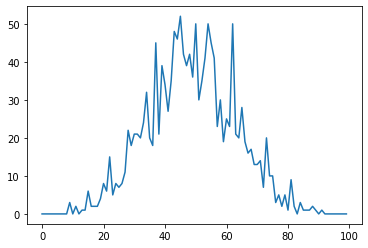

In [13]:
plt.plot(np.sum(pdf_pred[:,:],axis=0))

(<matplotlib.collections.PathCollection at 0x7fe35a419cd0>,)

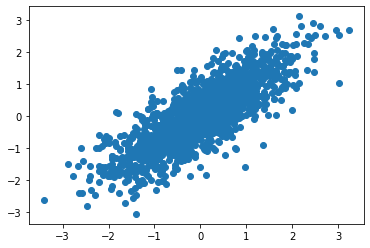

In [14]:
plt.scatter(y_test[:,100],predictions),

In [15]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test[:,100], predictions))
print('MSE:', metrics.mean_squared_error(y_test[:,100], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[:,100], predictions)))

MAE: 0.47988737731605285
MSE: 0.37301167837473503
RMSE: 0.6107468201920785


## Extract Infomation from the PDF

We can extract a single-value solution using the **PDF's**, using
$$x_{mean} = \int x_{pred} * PDF(x)dx $$

In [16]:
x = np.linspace(y.min(),y.max(),100)

In [17]:
pdf_pred.shape

(1500, 100)

In [18]:
from scipy import integrate
avg_pdf = []
for i in range(len(pdf_pred)):
    avg_pdf.append(integrate.simps(x*pdf_pred[i,:]))

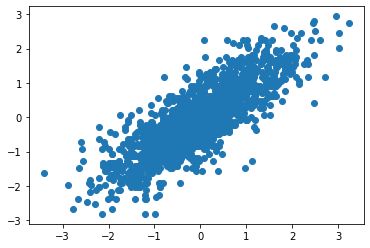

In [19]:
plt.scatter(y_test[:,100],avg_pdf)

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test[:,100], avg_pdf))
print('MSE:', metrics.mean_squared_error(y_test[:,100], avg_pdf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[:,100], avg_pdf)))

MAE: 0.4617747830887906
MSE: 0.34704378950629217
RMSE: 0.5891042263524275


# Neural Network

We have done the hypertunig using the file NNRegression.py. We can read the statistics of the best model and then implements the code.

In [21]:
# Neural Network Libs

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from sklearn.metrics import confusion_matrix
import keras as ks
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [22]:
stats = pd.read_csv("statistics.csv")

In [23]:
stats.head().sort_values("reg_mse")

,start,end,duration,round_epochs,loss,pdf_loss,reg_loss,pdf_acc,reg_mse,val_loss,val_pdf_loss,val_reg_loss,val_pdf_acc,val_reg_mse,activation,batch_size,compile,first_layer,second_layer,third_layer
4,06/15/21-141601,06/15/21-141619,17.846273,150,3.498394,3.859629,0.247274,0.056071,0.096160,3.896734,4.299534,0.271524,0.025714,0.114711,relu,32,adam,30,10,10
2,06/15/21-141523,06/15/21-141541,18.023037,150,3.527492,3.891674,0.249854,0.050000,0.097029,3.976317,4.388830,0.263702,0.042857,0.110710,relu,32,adam,20,10,10
1,06/15/21-141504,06/15/21-141523,19.123019,150,3.502400,3.863735,0.250391,0.060714,0.098150,3.952953,4.361624,0.274922,0.022857,0.119810,relu,32,adam,10,20,10
3,06/15/21-141541,06/15/21-141601,19.636926,150,3.487379,3.846105,0.258854,0.062143,0.105919,3.928025,4.333198,0.281466,0.037143,0.125224,relu,32,adam,20,20,10
0,06/15/21-141442,06/15/21-141504,22.104913,150,3.536479,3.900009,0.264700,0.053929,0.108672,3.928832,4.335188,0.271621,0.022857,0.117575,relu,32,adam,10,10,10


In [24]:
EarlyStop = EarlyStopping(monitor='reg_mse', mode='min', patience=10)
BATCH_SIZE = 64
STEPS_PER_EPOCH = len(data)//BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        0.0001,
        decay_steps=STEPS_PER_EPOCH*1000,
        decay_rate=1,
        staircase=False)

In [25]:
inputs = keras.layers.Input(5)
x = BatchNormalization()(inputs)
x = Dense(30, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
x = BatchNormalization()(x)
x = Dense(10, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
x = BatchNormalization()(x)
#x = Dense(10, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
output1 = Dense(1,activation = "linear",name = "reg") (x)
output2 = Dense(100,activation = "softmax",name ="pdf")(x) # using the numbers of bins
model = keras.Model(inputs=inputs, outputs=[output1,output2], name="rafael")

In [26]:
model.compile(
    loss={'reg': 'mean_absolute_error', 
                    'pdf': keras.losses.CategoricalCrossentropy()},loss_weights=[0.1,0.9],
              optimizer=ks.optimizers.RMSprop(lr_schedule),
              metrics={'pdf': "acc",
                      'reg': "mse"})

In [27]:
history = model.fit(X_train, {'pdf': y_train[:,:100], 'reg': y_train[:,100]}, batch_size = 32,epochs=128,validation_split = 0.2,verbose = 1,callbacks=[EarlyStop])

Epoch 1/128
88/88 [==============================] - 4s 13ms/step - loss: 4.3683 - reg_loss: 1.4777 - pdf_loss: 4.6891 - reg_mse: 3.5183 - pdf_acc: 0.0125 - val_loss: 4.2214 - val_reg_loss: 0.7929 - val_pdf_loss: 4.6020 - val_reg_mse: 0.9872 - val_pdf_acc: 0.0114
Epoch 2/128
88/88 [==============================] - 0s 4ms/step - loss: 4.2765 - reg_loss: 0.9460 - pdf_loss: 4.6463 - reg_mse: 1.4931 - pdf_acc: 0.0147 - val_loss: 4.2172 - val_reg_loss: 0.7767 - val_pdf_loss: 4.5992 - val_reg_mse: 0.9470 - val_pdf_acc: 0.0100
Epoch 3/128
88/88 [==============================] - 0s 3ms/step - loss: 4.2308 - reg_loss: 0.6459 - pdf_loss: 4.6288 - reg_mse: 0.6755 - pdf_acc: 0.0114 - val_loss: 4.2085 - val_reg_loss: 0.7332 - val_pdf_loss: 4.5943 - val_reg_mse: 0.8487 - val_pdf_acc: 0.0129
Epoch 4/128
88/88 [==============================] - 0s 4ms/step - loss: 4.2003 - reg_loss: 0.5501 - pdf_loss: 4.6056 - reg_mse: 0.4865 - pdf_acc: 0.0145 - val_loss: 4.1914 - val_reg_loss: 0.6472 - val_pdf_loss

In [28]:
test_predictions = model.predict(X_test)


print("Testing set Mean Abs Error: {:5.4f} ".format(metrics.mean_absolute_error(y_test[:,100],test_predictions[0])))
print("\n")
print("Testing set Mean Square Error: {:5.4f} ".format(metrics.mean_squared_error(y_test[:,100],test_predictions[0])))
print("\n")
print("Testing set Root Mean Square Error: {:5.4f} ".format(np.sqrt(metrics.mean_squared_error(y_test[:,100],test_predictions[0]))))

Testing set Mean Abs Error: 0.2597 


Testing set Mean Square Error: 0.1031 


Testing set Root Mean Square Error: 0.3211 


In [29]:
z = test_predictions[0]
pdf = test_predictions[1]

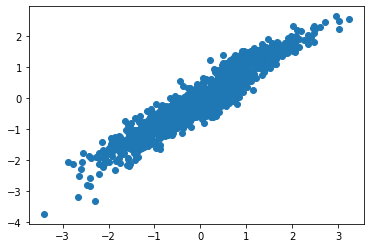

In [30]:
plt.scatter(y_test[:,100],test_predictions[0])

In [31]:
pdf.shape,x.shape

((1500, 100), TensorShape([None, 10]))

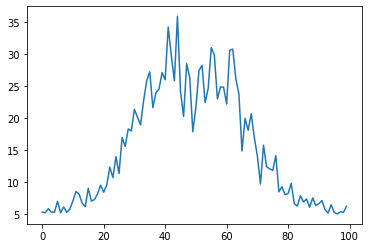

In [32]:
plt.plot(np.sum(pdf[:,:],axis=0))

In [33]:
x = np.linspace(y.min(),y.max(),100)
avg_pdf = []
for i in range(len(pdf)):
    avg_pdf.append(integrate.simps(x*pdf[i,:]))

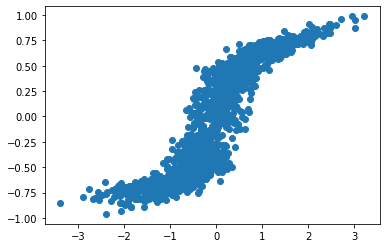

In [34]:
plt.scatter(y_test[:,100],avg_pdf)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test[:,100], avg_pdf))
print('MSE:', metrics.mean_squared_error(y_test[:,100], avg_pdf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test[:,100], avg_pdf)))

MAE: 0.40158867139964477
MSE: 0.2959329182254193
RMSE: 0.5439971674792243
